# <div class="usecase-title">Art Finder</div>

<div class="usecase-authors"><b>Authored by: </b>Harley Ngo</div>

<div class="usecase-date"><b>Date: </b> February 2024</div>

<div class="usecase-duration"><b>Duration:</b> 30 mins</div>

<div class="usecase-level-skill"></div>
<div class="usecase-level"><b> Level: </b>Intermediate</div>
<div class="usecase-skill"><b> Pre-requisite Skills: </b>Python, map

<div class="usecase-subsection-blurb">
  <i>Dataset 1:</i> Outdoor artworks
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/outdoor-artworks/table/" target="_blank">Dataset Link</a>
  <br>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 2:</i> Public artworks, fountains and monuments
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/public-artworks-fountains-and-monuments/table/" target="_blank">Dataset Link</a>
  <br>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 3:</i> Public memorials and sculptures
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/public-memorials-and-sculptures/table/" target="_blank">Dataset Link</a>
  <br>
</div>
<br>

<div class="usecase-subsection-blurb">
  <i>Dataset 4:</i> Plaques located at the Shrine of Remembrance
  <br>
  <a href="https://data.melbourne.vic.gov.au/explore/dataset/plaques-located-at-the-shrine-of-remembrance/table/" target="_blank">Dataset Link</a>
  <br>
</div>
<br>

# <div class="usecase-section-header"><h4>Project Objective, Overview & Research</h4></div>

<div class="usecase-subtitle">
<i><b>User Story</b></i>
</div>

<div class="usecase-subsection-blurb"><i>"As a citizen deeply invested in the cultural heritage of my city and a visitor eager to explore its artistic offerings, I seek to leverage Art Finder as a comprehensive guide to the diverse array of artworks and sculptures adorning public spaces. Through this digital platform, I aim to navigate the city with ease, discovering and learning about each piece's significance and history."</i></div>
<br>

<div class="usecase-subtitle">
<i><b>Objective</b></i>

<div class="usecase-subsection-blurb">'Art Finder' project contained two components, created over a 12 week investigation period. The objective is to create a map showing artworks and sculptures based on users' interest.</div>
<br>

<div class="usecase-subsection-blurb"><b>Part 1</b> includes set up, fetching or loading datasets, pre-processing, data cleaning, saving datasets, and merging datasets.</div>

<br>

<div class="usecase-subsection-blurb"><b>Part 2</b> contains creating map, including data points, artworks history and location description. </div>

# Part 1 (Set up & Pre-processing)
*   Set Up
*   Pre-processing
*   Merge Datasets

## Part 1.1: Set Up
*   Import Core Libraries
*   Import Dependencies

In [1]:
#Import core libraries
import requests
import pandas as pd
import numpy as np
import os

import json

import folium
from geopy.geocoders import Nominatim
from ipywidgets import interact, widgets
from IPython.display import display, HTML

from math import radians, sin, cos, sqrt, atan2

from tqdm.auto import tqdm
from io import StringIO

import matplotlib.pyplot as plt

In [2]:
def fetch_data(base_url, dataset, api_key, num_records=99, offset=0):
    all_records = []
    max_offset = 9900

    while True:
        if offset > max_offset:
            break

        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&api_key={api_key}'

        try:
            result = requests.get(url, timeout = 10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f'API request failed: {e}')
        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break

        offset += num_records

    df = pd.DataFrame(all_records)
    return df

BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
API_KEY = ''

## Part 1.2: Pre-Processing
*   Fetch each dataset, CoM API or load CSV
*   Load data to dataframe
*   Data cleaning (duplicates, missing values, data types, etc)
*   Save cleaned dataset

#### Dataset 1: Outdoor artworks

<a href="https://data.melbourne.vic.gov.au/explore/dataset/outdoor-artworks/information/" target="_blank">Dataset Link</a>

**Summary:** This dataset contains outdoor artwork such as memorials and sculptures located around the city including the makers behind the artwork and dates the artwork was installed.

This data allows residents and owners to explore the City of Melbourne's streets and intimate laneways, parks and waterfront to find inspiring works of art in surprising places.

##### Fetch Data

In [3]:
SENSOR_DATASET = 'outdoor-artworks'
outdoor_artworks = fetch_data(BASE_URL, SENSOR_DATASET, API_KEY)
outdoor_artworks.head()

,geo_point_2d,geo_shape,road_segment,location,latitude,asset_id,history,owner_type,description,object_type,art_date,inscription,longitude,company,service_manager,makers,property,classification,title
0,"{'lon': 144.96706152142454, 'lat': -37.8164236...","{'type': 'Feature', 'geometry': {'coordinates'...",Intersection of Swanston Street and Flinders Lane,Intersection of Swanston Street and Flinders L...,144.967062,1087398,None,Owned,"A patinated bronze sculpture, Beyond the Ocean...",Sculpture,1993,None,-37.816424,City of Melbourne,Arts & Culture Branch,"Quinn, Loretta",None,Sculpture,Beyond the Ocean of Existence
1,"{'lon': 144.96773271682704, 'lat': -37.8260713...","{'type': 'Feature', 'geometry': {'coordinates'...",None,Malthouse Plaza approximately 33m NW of CitiPo...,144.967733,1086752,None,Owned,Yellow painted welded plate steel sculpture.<b...,Sculpture,1980,None,-37.826071,City of Melbourne,Arts & Culture Branch,"Robertson Swann, Ron <br>",Malthouse Plaza,Sculpture,Vault
2,"{'lon': 144.97395547173446, 'lat': -37.8124342...","{'type': 'Feature', 'geometry': {'coordinates'...",None,Gordon Reserve approximately 44m West of Depar...,144.973955,1086576,None,Owned,William Stanford's bluestone fountain features...,Fountain,c1870,STANFORD FOUNTAIN / ERECTED 1871 / THIS FOUNTA...,-37.812434,City of Melbourne,Parks Services Branch,"Stanford, William",Gordon Reserve,Sculpture,Stanford Fountain
3,"{'lon': 144.9409520071531, 'lat': -37.82062403...","{'type': 'Feature', 'geometry': {'coordinates'...",None,Buluk Park,144.940952,1638170,<br>,Owned,Shadow Trees is an assemblage construction of ...,Sculpture,2014,None,-37.820624,City of Melbourne,None,"Smart, Sally <br>",Buluk Park,Sculpture,Shadow Trees
4,"{'lon': 144.98110223857506, 'lat': -37.8134099...","{'type': 'Feature', 'geometry': {'coordinates'...",None,Fitzroy Gardens approximately 34m SW of The Pa...,144.981102,1086740,None,Owned,Series of carvings on stump of one of the orig...,Sculpture,1934,"THE FAIRIES' TREE / CARVED BY OLA COHN, MBE AR...",-37.813410,City of Melbourne,Arts & Culture Branch,"COHN, Ola",Fitzroy Gardens,Sculpture,Fairies Tree


In [4]:
outdoor_artworks.columns

Index(['geo_point_2d', 'geo_shape', 'road_segment', 'location', 'latitude',
       'asset_id', 'history', 'owner_type', 'description', 'object_type',
       'art_date', 'inscription', 'longitude', 'company', 'service_manager',
       'makers', 'property', 'classification', 'title'],
      dtype='object')

##### Replace weird input as None

In [5]:
outdoor_artworks['history'].replace({'<br>':None, '<br> <br><br>':None, '<br><br><br>':None}, inplace=True)

##### Splitting into longitude and latitude

In [6]:
# Splitting into longitude and latitude columns
outdoor_artworks['longitude'] = outdoor_artworks['geo_point_2d'].apply(lambda x: x['lon'])
outdoor_artworks['latitude'] = outdoor_artworks['geo_point_2d'].apply(lambda x: x['lat'])

##### Drop unnecessary columns

In [7]:
outdoor_artworks.drop(columns=['geo_point_2d', 'geo_shape'], inplace=True)

#### Dataset 2: Public artworks, fountains and monuments

<a href="https://data.melbourne.vic.gov.au/explore/dataset/public-artworks-fountains-and-monuments/information/">Dataset Link</a>

**Summary:** The City of Melbourne maintains a register of all public artwork, fountains and monuments located within the City. This dataset contains various information regarding the type, category and geographical location of the artwork.

In [8]:
SENSOR_DATASET = 'public-artworks-fountains-and-monuments'
fountain_monument = fetch_data(BASE_URL, SENSOR_DATASET, API_KEY)
fountain_monument.head()

,asset_type,name,xorg,xsource,address_point,artist,alternate_name,art_date,mel_way_ref,respective_author,structure,co_ordinates,easting,northing
0,Fountain,Coles Fountain,City of Melbourne,MCC - Ortho Image March 2005 - Final,"517 Albert Street, EAST MELBOURNE",Robert Woodward,None,1981,2F_J1,City Of Melbourne,Stainless-steel fountain on bluestone paving,"{'lon': 144.973483976518, 'lat': -37.809770618...",321609.36000,5.813357e+06
1,Monument,Black Swan Memorial Drinking Fountain,City of Melbourne,MCC - Ortho Image March 2005 - Final,"Alexandra Gardens, St Kilda Road, MELBOURNE",Raymond B. Ewers,None,1974,2F_J6,City Of Melbourne,Bluestone drinking fountain with bronze plaque,"{'lon': 144.971824407255, 'lat': -37.819570561...",321486.86700,5.812266e+06
2,Art,Federation Bells,City of Melbourne,MCC - Ground Ortho Image March 2008,"Birrarung Marr, MELBOURNE",Designers Neil McLachlan and Anton Hasell,None,2002,2F_ K6,City of Melbourne,Bronze-alloy bells on galvanised-steel poles,"{'lon': 144.974158800684, 'lat': -37.818697331...",321690.25256,5.812367e+06
3,Art,Federation Bells,City of Melbourne,MCC - Ground Ortho Image March 2008,"Birrarung Marr, MELBOURNE",Designers Neil McLachlan and Anton Hasell,None,2002,2F_ K6,City of Melbourne,Bronze-alloy bells on galvanised-steel poles,"{'lon': 144.974128540287, 'lat': -37.818688233...",321687.56694,5.812368e+06
4,Art,Coat of Arms,City of Melbourne,MCC - Ortho Image March 2005 - Final,"104 Swanston Street, MELBOURNE",City of Melbourne,None,1992,2F_F4,City Of Melbourne,Brass pavement inlay,"{'lon': 144.966444170774, 'lat': -37.815048121...",321002.34200,5.812757e+06


##### Splitting into longitude and latitude

In [9]:
# Splitting into longitude and latitude columns
fountain_monument['longitude'] = fountain_monument['co_ordinates'].apply(lambda x: x['lon'])
fountain_monument['latitude'] = fountain_monument['co_ordinates'].apply(lambda x: x['lat'])

##### Replace CoM input

In [10]:
fountain_monument['respective_author'].unique()

array(['City Of Melbourne', 'City of Melbourne', 'VicUrban',
       'National Gallery of Victoria', None], dtype=object)

In [11]:
fountain_monument['respective_author'].replace({'City Of Melbourne': 'City of Melbourne'}, inplace=True)
fountain_monument['respective_author'].unique()

array(['City of Melbourne', 'VicUrban', 'National Gallery of Victoria',
       None], dtype=object)

##### Drop unnecessary columns

In [12]:
fountain_monument.drop(columns=['mel_way_ref', 'easting', 'northing'], inplace=True)

#### Dataset 3: Public memorials and sculptures

<a href="https://data.melbourne.vic.gov.au/explore/dataset/public-memorials-and-sculptures/information/">Dataset Link</a>

**Summary:** The City of Melbourne maintains a register of all of the sculptures and memorials located within the city; this record set contains various details in relation to the artwork and location within the City of Melbourne.

In [13]:
SENSOR_DATASET = 'public-memorials-and-sculptures'
memorials_sculptures = fetch_data(BASE_URL, SENSOR_DATASET, API_KEY)
memorials_sculptures.head()

,description,title,co_ordinates
0,Arts & Heritage - Sculpture - Memorial Sculpture,South African War Memorial (Memorial to Fallen...,"{'lon': 144.97185679034, 'lat': -37.8259414540..."
1,Arts & Heritage - Memorials - Fountain,Macpherson-Robertson Fountain,"{'lon': 144.972934260924, 'lat': -37.832377458..."
2,Arts & Heritage - Memorials - Drinking Fountain,Councillor William Cook Memorial Drinking Foun...,"{'lon': 144.966190018508, 'lat': -37.785287472..."
3,Arts & Heritage - Sculpture - Bust,Sir Samuel Gillott,"{'lon': 144.972615422561, 'lat': -37.813725736..."
4,Arts & Heritage - Sculpture - Monument,Sir William John Clarke,"{'lon': 144.974344858809, 'lat': -37.813672953..."


##### Splitting the unique values into three lists

In [14]:
description_list, asset_type_list, object_type_list, name_list = [], [], [], []

for value in memorials_sculptures['description']:
    parts = value.split(' - ')
    if len(parts) == 4:
        description_list.append(parts[0])
        asset_type_list.append(parts[1])
        object_type_list.append(parts[2])
        name_list.append(parts[3])
    elif len(parts) == 3:
        description_list.append(parts[0])
        asset_type_list.append(parts[1])
        object_type_list.append(parts[2])
        name_list.append('')
    elif len(parts) == 2:
        description_list.append(parts[0])
        asset_type_list.append(parts[1])
        object_type_list.append('')
        name_list.append('')
    elif len(parts) == 1:
        description_list.append('')
        asset_type_list.append('')
        object_type_list.append('')
        name_list.append('')

# Create a DataFrame from the split data
split_df = pd.DataFrame({'description_type': description_list,
                            'asset_type': asset_type_list,
                             'object_type': object_type_list,
                            'name': name_list}, index=memorials_sculptures.index)

# Merge split_df to memorials_sculptures DataFrame
memorials_sculptures = pd.merge(memorials_sculptures, split_df, left_index=True, right_index=True)

##### Splitting into longitude and latitude columns

In [15]:
# Splitting into longitude and latitude columns
memorials_sculptures['longitude'] = memorials_sculptures['co_ordinates'].apply(lambda x: x['lon'])
memorials_sculptures['latitude'] = memorials_sculptures['co_ordinates'].apply(lambda x: x['lat'])

#### Dataset 4: Plaques located at the Shrine of Remembrance

<a href="https://data.melbourne.vic.gov.au/explore/dataset/plaques-located-at-the-shrine-of-remembrance/information/">Dataset Link</a>

**Summary:** This dataset contains details on the plaques located at the Shrine of Remembrance of Reserve​. Many of these plaques are located under trees, and where relevant, this dataset also contains details of the tree next to the plaque.

In [16]:
SENSOR_DATASET = 'plaques-located-at-the-shrine-of-remembrance'
plaques = fetch_data(BASE_URL, SENSOR_DATASET, API_KEY)
plaques.head()

,asset_number,title_of_plaque,description_of_plaque,tree_common_name,tree_scientific_name,date_of_tree_planted,lon,lat,location
0,1498995,2/4TH LIGHT ANTI-AIRCRAFT REGIMENT 9TH DIVISIO...,2/4TH LIGHT ANTI-AIRCRAFT REGIMENT 9TH DIVISIO...,London Plane,Platanus acerifolia,1998-07-09,-37.831930,144.973212,"{'lon': 144.97321170883876, 'lat': -37.8319297..."
1,1499003,THE AUSTRALIAN LEGION OF EX-SERVICEMEN AND WOMEN,1944 1994 FOR ALL WHO SERVE THIS SPOTTED GUM W...,Spotted Gum,Corymbia maculata,1998-07-09,-37.832137,144.972873,"{'lon': 144.9728731147446, 'lat': -37.83213732..."
2,1499042,ROYAL AUSTRALIAN ENGINEERS (TRANSPORTATION SER...,ROYAL AUSTRALIAN ENGINEERS (TRANSPORTATION SER...,River Red Gum,Eucalyptus camaldulensis,1998-07-09,-37.831394,144.972049,"{'lon': 144.97204947974228, 'lat': -37.8313940..."
3,1499163,2/33 BATTALION,DEDICATED TO THOSE WHO SERVED N THE 2/33 BATTA...,UNKNOWN,UNKNOWN UNKNOWN,2000-01-02,-37.828572,144.971739,"{'lon': 144.97173886572406, 'lat': -37.8285718..."
4,1499155,22ND AUSTRALIAN INFANTRY BATTALION,22ND AUSTRALIAN INFANTRY BATTALION 1939-1945,English Elm,Ulmus procera,1998-07-09,-37.828755,144.972360,"{'lon': 144.97236009726893, 'lat': -37.8287553..."


##### Splitting into longitude and latitude columns

In [17]:
# Splitting into longitude and latitude columns
plaques['longitude'] = plaques['location'].apply(lambda x: x['lon'])
plaques['latitude'] = plaques['location'].apply(lambda x: x['lat'])

##### Drop unnecessary columns

In [18]:
plaques.drop(columns=['asset_number', 'lon', 'lat'], inplace=True)

#### Dataset 5: Off-street car parks with capacity and type

<a href="https://data.melbourne.vic.gov.au/explore/dataset/off-street-car-parks-with-capacity-and-type/information/">Dataset Link</a>

**Summary:** Data collected as part of the City of Melbourne's Census of Land Use and Employment (CLUE). The data covers the period 2002-2022.
The number of off-street car parking spaces per property is recorded in CLUE. Car parking can be classified as:
• Commercial: Car parking in a publicly accessible, paid parking facility
• Residential: Car parking in a residential building or property
• Private: Car parking in a non-residential building that is provided for use by staff, customers or visitors.

In [19]:
SENSOR_DATASET = 'off-street-car-parks-with-capacity-and-type'
parking = fetch_data(BASE_URL, SENSOR_DATASET, API_KEY)
parking.head()

,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,parking_type,parking_spaces,longitude,latitude,location
0,2011,406,108925,108925,590 Spencer Street WEST MELBOURNE 3003,West Melbourne (Residential),Residential,1,144.946686,-37.806656,"{'lon': 144.94668561434997, 'lat': -37.8066556..."
1,2011,406,108930,108930,582 Spencer Street WEST MELBOURNE 3003,West Melbourne (Residential),Residential,2,144.946902,-37.806783,"{'lon': 144.9469023048, 'lat': -37.80678326824..."
2,2011,409,100440,100440,6-8 Anderson Street WEST MELBOURNE 3003,West Melbourne (Residential),Residential,1,144.942130,-37.805921,"{'lon': 144.94212996079926, 'lat': -37.8059208..."
3,2011,412,100002,100002,17-37 Abbotsford Street WEST MELBOURNE 3003,West Melbourne (Residential),Private,4,144.943421,-37.807176,"{'lon': 144.94342093747295, 'lat': -37.8071761..."
4,2011,413,100004,100004,51-57 Abbotsford Street WEST MELBOURNE 3003,West Melbourne (Residential),Residential,4,144.944180,-37.806637,"{'lon': 144.9441801118706, 'lat': -37.8066369008}"


##### Splitting into longitude and latitude columns

In [20]:
# Splitting into longitude and latitude columns
parking['longitude'] = parking['location'].apply(lambda x: x['lon'] if x is not None else None)
parking['latitude'] = parking['location'].apply(lambda x: x['lat'] if x is not None else None)

## Part 1.3: Merging datasets

### Fix typo of datasets artworks' titles

#### Between outdoor_artworks and memorials_sculptures

In [21]:
memorials_sculptures['title'].isin(outdoor_artworks['title']).sum()

142

In [22]:
unique_titles_df1 = set(memorials_sculptures['title']) - set(outdoor_artworks['title'])
unique_titles_df2 = set(outdoor_artworks['title']) - set(memorials_sculptures['title'])

# Titles unique to memorials_sculptures
print("Titles unique to memorials_sculptures:")
for title in unique_titles_df1:
    print(title)

# Titles unique to outdoor_artworks
print("\nTitles unique to outdoor_artworks:")
for title in unique_titles_df2:
    print(title)

Titles unique to memorials_sculptures:
World War 1 Memorial
Georges Fountain
Macpherson-Robertson Fountain
Maxims of Behaviour
Reynold's Reserve Drinking Fountain
King George V
Children's Lake Waterfall
R.J. & F.G.J. Hardy Memorial Drinking Fountain|Also Know as Hardy Drinking Fountain
Grant's Fountain
Pioneer Women's Memorial
People's Path
Larry La Trobe
Lynch's Bridge Mosaic Mural
Painted Poles
Man with the Donkey
Dairy Hall Window
Sir Edward "Weary" Dunlop
Dinny O'Hern Fountain
Scar: A Stolen Vision
Edmund Fitzgibbon Memorial

Titles unique to outdoor_artworks:
People''''''''s Path
The River Runs Through It
Dr Sun Yat Sen
R.J. & F.G.J. Hardy Memorial Drinking Fountain
Continuum
Scar - A Stolen Vision
Parallax
Poise
Standing by Tunnerminnerwait and Maulboyheenner
Reynold''''s Reserve Drinking Fountain
Blue Line
Dinny O''''Hearn Fountain
Monument Park
Looking Glass
Walk of Stars
Bellair Street Mosaics
Anchor
Grant''s Fountain
IOU
Sir Edward ''''''''Weary'''''''' Dunlop
Warin the Womba

##### Change values for memorials_sculptures

In [23]:
value_map = {'Scar: A Stolen Vision': 'Scar - A Stolen Vision', 
             'King George V': 'King George V Memorial',
             'Macpherson-Robertson Fountain': 'Macpherson Robertson Fountain',
             'Man with the Donkey': 'Man with the Donkey (aka Private John Simpson and his Little Donkey)',
             'Edmund Fitzgibbon Memorial': 'Edmund FitzGibbon Memorial'}

memorials_sculptures['title'] = memorials_sculptures['title'].replace(value_map)

In [24]:
value_map = {"Pioneer Women''''''''s Memorial": "Pioneer Women's Memorial",
             "Reynold''''s Reserve Drinking Fountain": "Reynold's Reserve Drinking Fountain",
             "Grant''s Fountain": "Grant's Fountain",
             "R.J. & F.G.J. Hardy Memorial Drinking Fountain": "R.J. & F.G.J. Hardy Memorial Drinking Fountain|Also Know as Hardy Drinking Fountain",
             "Sir Edward ''''''''Weary'''''''' Dunlop": 'Sir Edward "Weary" Dunlop',
             'Painted Poles 1 [State Library of Victoria]': 'Painted Poles',
             "People''''''''s Path": "People's Path",
             "Children''''s Lake Waterfall": "Children's Lake Waterfall",
             "Lynch''''s Bridge Mosaic Mural": "Lynch's Bridge Mosaic Mural"}

outdoor_artworks['title'] = outdoor_artworks['title'].replace(value_map)

In [25]:
memorials_sculptures['title'].isin(outdoor_artworks['title']).sum()

157

### Between outdoor_artworks and fountain_monument

In [26]:
fountain_monument['name'].isin(outdoor_artworks['title']).sum()

212

In [27]:
unique_titles_df3 = set(fountain_monument['name']) - set(outdoor_artworks['title'])
unique_titles_df4 = set(outdoor_artworks['title']) - set(fountain_monument['name'])

# Titles unique to fountain_monument
print("Titles unique to fountain_monument:")
for title in unique_titles_df3:
    print(title)

# Titles unique to outdoor_artworks
print("\nTitles unique to outdoor_artworks:")
for title in unique_titles_df4:
    print(title)

Titles unique to fountain_monument:
A History Apparatus - Vessel, Craft & Beacon
Dinny O'Hearn Fountain
R.J. & F.G.J. Hardy Memorial Drinking Fountain
Georges Fountain
Chinese Lion Guardians
Bust of Sir Samuel Gillott
Motorcycle
John Batman Memorial (1)
Maxims of Behaviour
Parrallax
Another View, Site 17
John Pascoe Fawkner
South African War Memorial
William Ievers Senior Memorial Drinking Fountain
Feng Shui
Australian Hellenic War Memorial
Shoal Fly By
Nurse Edith Cavell
King George V
Burke and Wills Cairn
Pastor Sir Doug and Lady Gladys Nicholls
Hotham Hill Paving Inlay
Mockridge Fountain
Duke and Duchess of York Memorial
Photo art billboard
Port Phillip Monument
John Batman Memorial (2)
Lady Janet Clarke Memorial
Three Businessmen Who Brought Their Own Lunch
Bust of Dr Louis Smith
Webb Bridge
Adam Lindsay Gordan Memorial
Man with the Donkey
Dolphin Fountain
Larry LaTrobe
William Ievers Junior Memorial Drinking Fountain
Fault Line
Dairy Hall Window
Another View, Site 8
Another View, 

In [28]:
value_map = {'Adam Lindsay Gordan Memorial': 'Adam Lindsay Gordon Memorial',
             'Burke and Wills Cairn': 'Burke & Wills Cairn',
             'Duke and Duchess of York Memorial': 'Duke & Duchess of York Memorial [also known as Temperence]',
             'Edmund Fitzgibbon Memorial': 'Edmund FitzGibbon Memorial',
             'Hotham Hill Paving Inlay': 'Hotham Hill Pavement Inlay',
             'James C. Roberts': 'James C Roberts Memorial',
             'John Pascoe Fawkner': 'John Pascoe Fawkner Memorial',
             'King George V': 'King George V Memorial',
             'Lady Janet Clarke Memorial': 'Janet Lady Clarke Memorial Sculpture',
             'Man with the Donkey': 'Man with the Donkey (aka Private John Simpson and his Little Donkey)',
             'Miraggio': 'Miraggio [also known as Seated Figure]',
             'Motorcycle': 'Motorcyclist Harold Parsons Memorial',
             'Nurse Edith Cavell': 'Nurse Edith Cavell Memorial',
             'Parrallax': 'Parallax',
             'Pastor Sir Doug and Lady Gladys Nicholls': 'Pastor Sir Doug Nicholls and Lady Gladys Nicholls',
             'Photo art billboard': 'Photo Art Billboard',
             'R.J. & F.G.J. Hardy Memorial Drinking Fountain': 'R.J. & F.G.J. Hardy Memorial Drinking Fountain|Also Know as Hardy Drinking Fountain',
             'South African War Memorial': 'South African War Memorial (Memorial to Fallen Soldiers)',
             'Three Businessmen Who Brought Their Own Lunch': 'Three Businessmen Who Brought Their Own Lunch: Batman, Swanston & Hoddle',
             'William Ievers Junior Memorial Drinking Fountain': 'William Ievers (Jnr) Memorial Drinking Fountain',
             'William Ievers Senior Memorial Drinking Fountain': 'William Ievers (Snr) Memorial Drinking Fountain',
             'A History Apparatus - Vessel, Craft & Beacon': 'A History Apparatus - Vessel Craft & Beacon',
             'Another View, Site 1': 'Another View Site 1',
             'Another View, Site 17': 'Another View Site 17',
             'Another View, Site 8': 'Another View Site 8',
             'Australian Hellenic War Memorial': 'Australian Hellenic Memorial',
             'Birrarung Wilam': 'Birrarung Wilam [Common Ground]',
             'Fault Line': 'Faultline',
             'John Batman Memorial (1)': 'John Batman Memorial',
             'John Batman Memorial (2)': 'John Batman Memorial [2]',
             'Port Phillip Monument': 'Port Philip Monument',
             'Bust of Sir Samuel Gillott': 'Sir Samuel Gillott',
             'Bust of Dr Louis Smith': 'Dr Louis Smith'
}

fountain_monument['name'] = fountain_monument['name'].replace(value_map)

In [29]:
value_map = {"Dinny O''''Hearn Fountain": "Dinny O'Hearn Fountain"}

outdoor_artworks['title'] = outdoor_artworks['title'].replace(value_map)

In [30]:
fountain_monument['name'].isin(outdoor_artworks['title']).sum()

251

### Between fountain_monument and memorials_sculptures

In [31]:
fountain_monument['name'].isin(memorials_sculptures['title']).sum()

219

In [32]:
unique_titles_df5 = set(fountain_monument['name']) - set(memorials_sculptures['title'])
unique_titles_df6 = set(memorials_sculptures['title']) - set(fountain_monument['name'])

# Titles unique to fountain_monument
print("Titles unique to fountain_monument:")
for title in unique_titles_df5:
    print(title)

# Titles unique to memorials_sculptures
print("\nTitles unique to memorials_sculptures:")
for title in unique_titles_df6:
    print(title)

Titles unique to fountain_monument:
Dinny O'Hearn Fountain
Continuum
Chinese Lion Guardians
Parallax
Poise
Walk of Stars
IOU
Ned and Dan
Anchor
Feng Shui
Shoal Fly By
Outside Inside Out
Aqualung
Mockridge Fountain
Photo Art Billboard
Art Wall
Threaded Field
Webb Bridge
The Wave
Car Nuggets
HeartLand
Angel
Dolphin Fountain
Larry LaTrobe
Eagle

Titles unique to memorials_sculptures:
The Dolphin Fountain
World War 1 Memorial
Raising the Rattler Pole
John Mockridge Fountain
Electric Supply Box D
Fruition
Mermaid and Fish
Sir William Brunton Drinking Fountain
Ecophene
Argyle Square Piazza
Tianjin Garden Chinese Lion Guardians
Brunton Drinking Fountain East
Widow and Children
Elliot Drinking Fountain
Brunton Drinking Fountain West
Children's Lake Waterfall
Koorie Mural
Boer War Monument
Larry La Trobe
Waterfall Fountain
Great Petition
Victoria Police Memorial
Dinny O'Hern Fountain
Victorian Rowing Association World War 1 Memorial


In [33]:
value_map = {"Dinny O'Hern Fountain": "Dinny O'Hearn Fountain",
             "Larry La Trobe": "Larry LaTrobe"}

memorials_sculptures['title'] = memorials_sculptures['title'].replace(value_map)

In [34]:
fountain_monument['name'].isin(memorials_sculptures['title']).sum()

221

### Merging datasets

#### Merge outdoor_artworks with memorials_sculptures

In [35]:
merged_df = pd.merge(outdoor_artworks, memorials_sculptures, on='title', suffixes=('_df1', '_df2'), how='outer')

merged_df['latitude'] = merged_df['latitude_df1'].combine_first(merged_df['latitude_df2'])
merged_df['longitude'] = merged_df['longitude_df1'].combine_first(merged_df['longitude_df2'])
merged_df['object_type'] = merged_df['object_type_df1'].combine_first(merged_df['asset_type'])

merged_df = merged_df[['road_segment', 'location', 'history', 'owner_type', 'description_df1', 'art_date', 'inscription',
           'makers', 'property', 'title', 'latitude', 'longitude', 'object_type']]

#### Merge with fountain_monument

In [36]:
fountain_monument.rename(columns={'name':'title'}, inplace=True)

merged_df = pd.merge(merged_df, fountain_monument, suffixes=('_df1', '_df2'), on = 'title', how = 'outer')
merged_df.fillna(value=np.nan, inplace=True)

merged_df['asset_type'] = merged_df['object_type'].combine_first(merged_df['asset_type'])
merged_df['latitude'] = merged_df['latitude_df1'].combine_first(merged_df['latitude_df2'])
merged_df['longitude'] = merged_df['longitude_df1'].combine_first(merged_df['longitude_df2'])
merged_df['artist'] = merged_df['artist'].combine_first(merged_df['makers'])
merged_df['location'] = merged_df['location'].combine_first(merged_df['road_segment'])
merged_df['art_date'] = merged_df['art_date_df2'].combine_first(merged_df['art_date_df1'])

merged_df = merged_df[['location', 'history', 'owner_type', 'description_df1','inscription', 'property', 'asset_type', 'address_point', 'artist', 
                       'respective_author', 'structure', 'latitude', 'longitude', 'art_date', 'title']]

merged_df

,location,history,owner_type,description_df1,inscription,property,asset_type,address_point,artist,respective_author,structure,latitude,longitude,art_date,title
0,Intersection of Swanston Street and Flinders L...,NaN,Owned,"A patinated bronze sculpture, Beyond the Ocean...",NaN,NaN,Sculpture,"44 Swanston Street, MELBOURNE",Loretta Quinn,City of Melbourne,Bronze sculpture on granite plinth,-37.816424,144.967062,1993,Beyond the Ocean of Existence
1,Malthouse Plaza approximately 33m NW of CitiPo...,NaN,Owned,Yellow painted welded plate steel sculpture.<b...,NaN,Malthouse Plaza,Sculpture,"51 Grant Street, SOUTHBANK",Ron Roberston-Swann,City of Melbourne,Steel plate sculpture,-37.826071,144.967733,1980,Vault
2,Gordon Reserve approximately 44m West of Depar...,NaN,Owned,William Stanford's bluestone fountain features...,STANFORD FOUNTAIN / ERECTED 1871 / THIS FOUNTA...,Gordon Reserve,Fountain,"88 Spring Street, EAST MELBOURNE",William Stanford,City of Melbourne,Bluestone fountain,-37.812434,144.973955,c. 1870,Stanford Fountain
3,Buluk Park,NaN,Owned,Shadow Trees is an assemblage construction of ...,NaN,Buluk Park,Sculpture,NaN,"Smart, Sally <br>",NaN,NaN,-37.820624,144.940952,2014,Shadow Trees
4,Fitzroy Gardens approximately 34m SW of The Pa...,NaN,Owned,Series of carvings on stump of one of the orig...,"THE FAIRIES' TREE / CARVED BY OLA COHN, MBE AR...",Fitzroy Gardens,Sculpture,"88 Clarendon Street, EAST MELBOURNE",Ola Cohn,City of Melbourne,Red Gum carving,-37.813410,144.981102,1934,Fairies Tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,NaN,NaN,NaN,NaN,NaN,NaN,Fountain,"City Square, Collins St, MELBOURNE","Ron Jones, Simon Perry and Darryl Cowie",City of Melbourne,Concrete fountain,-37.815522,144.966994,c. 2000,Mockridge Fountain
313,NaN,NaN,NaN,NaN,NaN,NaN,Art,"50 River Esplanade, DOCKLANDS",Robert Owen and Denton Corker Marshall,VicUrban,Pedestrian and cyclist bridge,-37.823976,144.947233,2003,Webb Bridge
314,NaN,NaN,NaN,NaN,NaN,NaN,Art,"698 Collins Street, DOCKLANDS",Guan Wei,VicUrban,Multi-panel painting,-37.819823,144.951105,2003,Feng Shui
315,NaN,NaN,NaN,NaN,NaN,NaN,Fountain,"4 Lansdowne Street, EAST MELBOURNE",June Arnold,City of Melbourne,Bronze and granite fountain,-37.811888,144.980016,1982,Dolphin Fountain


#### Convert art_date to number

In [37]:
merged_df['art_date'].unique()

array(['1993', '1980', 'c. 1870', '2014', '1934', '1912', '1933', '1995',
       '1992', '1996', '2003', '1994', '2001', '2005', 'c. 1880',
       'various', '1780', '1916', '1938', '2010', 'c. 1970', '1862',
       '2007', '1887', '1900-1903', '1936', '1873', '2008', '1988',
       '1939', '1920', 'unknown', '2012', '1903', '1982', '2013', '2002',
       '2006', '1901', '2004', '1981', '1926', '1999', '1935', '1950',
       '1998', '1960', '1952', '1973', '1913', '1978', '1937', '1905',
       '1911', '1965', '1923', '1948', '1997', 'c. 1935', 'c1920', '1864',
       '1930', '2011', '1904', '1907', 'c. 2000', '1902', 'c. 1850',
       '1931', '1925', '1940', 'c. 1900', 'c1936', '1974', '1863', '2000',
       '2016', '1910', '1941', '1978-1979', '1914', '1994-1995', '1880',
       'c. 1888', '1865', '1970', '1908', '2009', '1964', '1890', '1871',
       'c1933', '1915', '1975', '1877', '1992 and 1996', nan],
      dtype=object)

In [38]:
merged_df['art_date'].replace({'c. 1870': 1870, 'c. 1880': 1880,  '1900-1903': 1903, 'unknown': np.nan, 'c. 1970': 1970,
                               'c. 1935': 1935, 'c1920': 1920, 'c. 2000': 2000, 'c. 1850': 1850, 'c. 1900': 1900,
                               'c1936': 1936, '1978-1979': 1979, '1994-1995': 1995, 'c. 1888': 1888, '1992 and 1996': 1996, 'c1933': 1933}, inplace=True)
merged_df['art_date'].unique()

array(['1993', '1980', 1870, '2014', '1934', '1912', '1933', '1995',
       '1992', '1996', '2003', '1994', '2001', '2005', 1880, 'various',
       '1780', '1916', '1938', '2010', 1970, '1862', '2007', '1887', 1903,
       '1936', '1873', '2008', '1988', '1939', '1920', nan, '2012',
       '1903', '1982', '2013', '2002', '2006', '1901', '2004', '1981',
       '1926', '1999', '1935', '1950', '1998', '1960', '1952', '1973',
       '1913', '1978', '1937', '1905', '1911', '1965', '1923', '1948',
       '1997', 1935, 1920, '1864', '1930', '2011', '1904', '1907', 2000,
       '1902', 1850, '1931', '1925', '1940', 1900, 1936, '1974', '1863',
       '2000', '2016', '1910', '1941', 1979, '1914', 1995, '1880', 1888,
       '1865', '1970', '1908', '2009', '1964', '1890', '1871', 1933,
       '1915', '1975', '1877', 1996], dtype=object)

# Part 2: Overview about Artworks in Melbourne

#### Number of Artworks Over Years

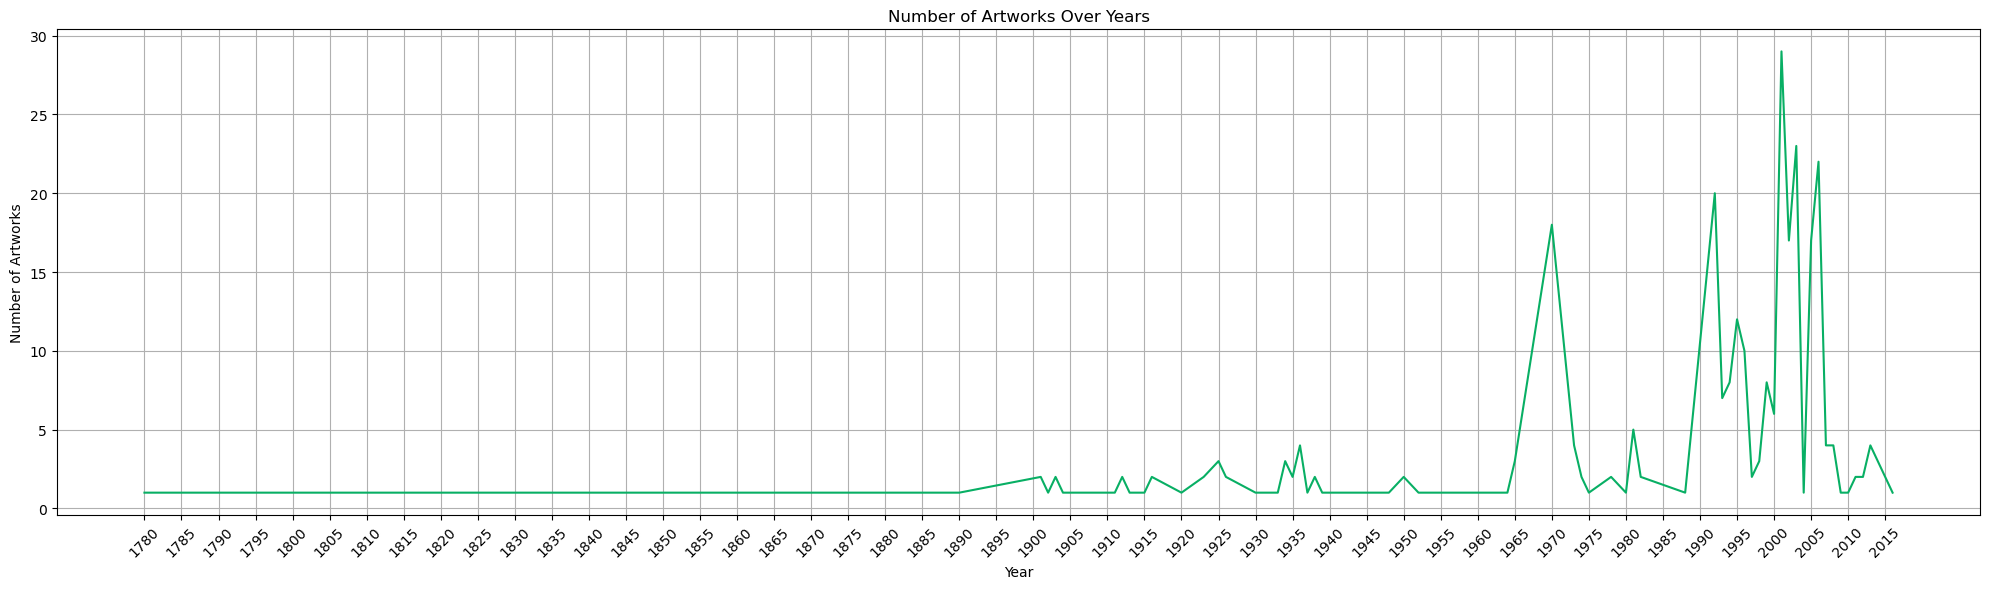

In [39]:
# Convert 'art_date' column to datetime, ignoring errors and coercing invalid values to NaT
merged_df['art_date'] = pd.to_datetime(merged_df['art_date'], errors='coerce')

# Drop rows with NaT values
merged_df.dropna(subset=['art_date'], inplace=True)

# Group by year and count the number of artworks
artworks_per_year = merged_df.groupby(merged_df['art_date'].dt.year).size()

# Plotting the line chart
plt.figure(figsize=(20, 6))
artworks_per_year.plot(kind='line', color='#08af64', linestyle='-')
plt.title('Number of Artworks Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Artworks')
plt.grid(True)

# Set x-ticks at intervals (every 5 years)
plt.xticks(range(min(artworks_per_year.index), max(artworks_per_year.index)+1, 5), rotation=45)

plt.tight_layout()
plt.show()

#### Number of Artworks by Type

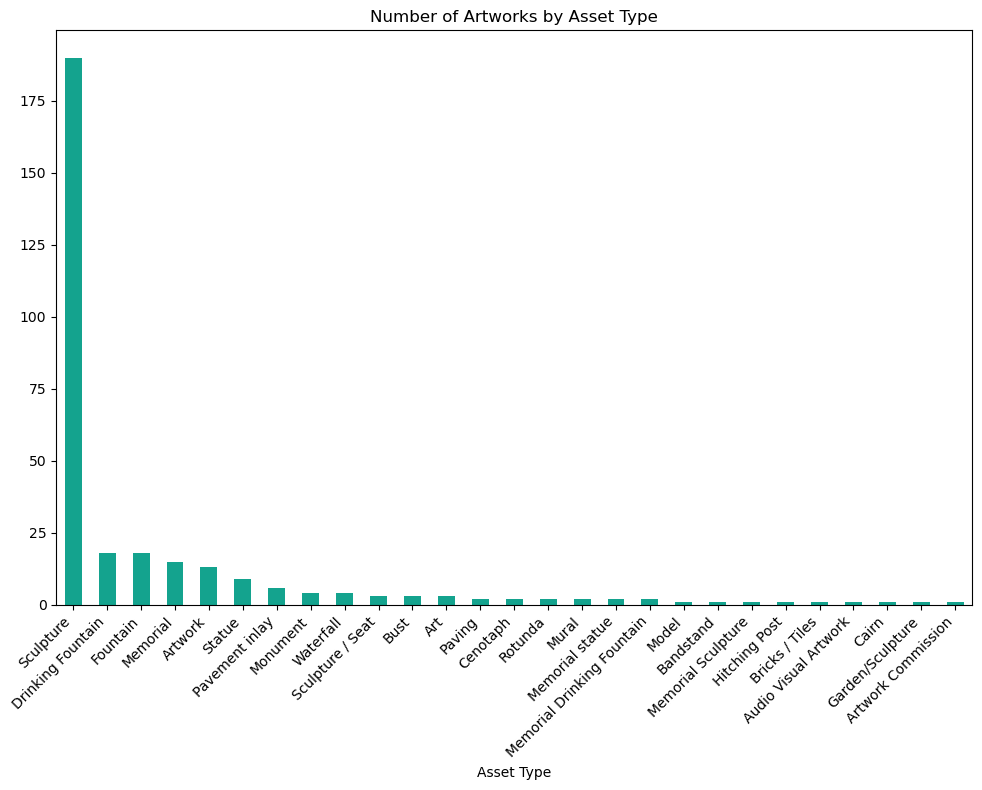

In [40]:
# Count the number of rows based on each unique value in the "asset_type" column
asset_type_counts = merged_df['asset_type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 8))
asset_type_counts.plot(kind='bar', color='#14a38e')
plt.title('Number of Artworks by Asset Type')
plt.xlabel('Asset Type')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#### Artworks search tool for users

In [41]:
def search_by_keyword(keyword):
    matches = merged_df[merged_df['title'].str.contains(keyword, case=False)]
    
    if not matches.empty:
        for index, row in matches.iterrows():
            print(f"\033[1mThe Artwork you're looking for is:\033[0m {row['title']}")
            print(f"\033[1mArtist:\033[0m {row['artist'] if not pd.isnull(row['artist']) else 'Data not available'}")
            print(f"\033[1mYear:\033[0m {row['art_date'].year if not pd.isnull(row['artist']) else 'Data not available'}")
            print(f"\033[1mType:\033[0m {row['asset_type'] if not pd.isnull(row['asset_type']) else 'Data not available'}")
            print(f"\033[1mStructure:\033[0m {row['structure'] if not pd.isnull(row['asset_type']) else 'Data not available'}")
            print(f"\033[1mArtwork Description:\033[0m {row['description_df1'] if not pd.isnull(row['asset_type']) else 'Data not available'}")
            print(f"\033[1mAddress:\033[0m {row['address_point'] if not pd.isnull(row['address_point']) else 'Data not available'}")
            print(f"\033[1mLocation Description:\033[0m {row['location'] if not pd.isnull(row['location']) else 'Data not available'}")
            print(f"\033[1mHistory:\033[0m {row['history'] if not pd.isnull(row['history']) else 'Data not available'}")
            print()
    else:
        print("No matches found.")

# search_term = input("Enter a keyword to search: ")
search_term = "mural"
search_by_keyword(search_term)

The Artwork you're looking for is: Koorie Mural
Artist: Marie Clark and Sonja Hodge
Year: 1995
Type: Mural
Structure: nan
Artwork Description: Mural in the Carlton Baths.
Address: Data not available
Location Description: City Baths approximately 27m North of Poolhouse Coffee, 6 Franklin Street, Melbourne, 3000
History: Specifically designed for the Carlton Baths Community Centre

The Artwork you're looking for is: Lynch's Bridge Mosaic Mural
Artist: Elizabeth MacKinnon
Year: 1998
Type: Mural
Structure: Ceramic tile mural
Artwork Description: The mural depicts the stockmen with their horses and dogs, driving sheep and cattle to market as they did for many years. <br><br>In 1992, Elizabeth MacKinnon was commissioned to create a public artwork for the old Newmarket saleyards, transformed into a residential neighbourhood as part of the state government Lynch's Bridge Project. Commissioned at a key juncture in the site's life, the mosaic recollects the saleyards' past and acknowledges its f

# Part 3: Creating maps

In [42]:
melbourne_coords = [-37.8136, 144.9631]

# Define function to calculate distance between two coordinates
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula to calculate distance
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # Radius of the Earth in kilometers
    
    return distance

# Define function to find top 5 car parks near artwork
def find_nearest_car_parks(artwork_lat, artwork_lon, parking_data):
    # Calculate distances to all car parks
    distances = []
    for index, row in parking_data.iterrows():
        distance = calculate_distance(artwork_lat, artwork_lon, row['latitude'], row['longitude'])
        distances.append((row['building_address'], distance))
    
    # Sort distances and return top 5 car parks
    sorted_distances = sorted(distances, key=lambda x: x[1])
    top_5_car_parks = sorted_distances[:5]
    
    return top_5_car_parks

# Modify add_markers function to include markers for car parks
def add_markers(map_obj, data, parking_data):
    for index, row in data.iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['title']).add_to(map_obj)
        
        # Find top 5 car parks near artwork
        nearest_car_parks = find_nearest_car_parks(row['latitude'], row['longitude'], parking_data)
        
        # Add markers for car parks in green
        for car_park in nearest_car_parks:
            folium.Marker(location=parking_data.loc[parking_data['building_address'] == car_park[0], ['latitude', 'longitude']].values[0], 
                          popup=car_park[0], 
                          icon=folium.Icon(color='green')).add_to(map_obj)

# Define function to update map based on search term and object type
def update_map(search_term, object_type):
    # Filter data based on search term and object type
    if search_term.strip():
        filtered_data = outdoor_artworks[outdoor_artworks['location'].str.contains(search_term, case=False)]
    else:
        filtered_data = outdoor_artworks.copy()
    
    if object_type != "All":
        filtered_data = filtered_data[filtered_data['object_type'] == object_type]
    
    # Create map object
    melbourne_map = folium.Map(location=melbourne_coords, zoom_start=12)
    
    # Add markers to the map
    add_markers(melbourne_map, filtered_data, parking)
    
    # Display the map
    display(melbourne_map)

# Create interactive widget
interactive_map = widgets.interactive(update_map,
                                      search_term=widgets.Text(value='', placeholder='Search by Location', description='Location:'),
                                      object_type=widgets.Dropdown(options=['All'] + outdoor_artworks['object_type'].unique().tolist(), value='All', description='Object Type:')
                                     )

# Display the interactive widget
display(interactive_map)

interactive(children=(Text(value='', description='Location:', placeholder='Search by Location'), Dropdown(desc…